In [1]:
#for data processing
import pandas as pd
import numpy as np
import string
import re

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for nlp
from collections import Counter
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#for regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import metrics

#for evaluation
import scipy

# EDA
<a id='EDA'></a>

In [2]:
#load train data
cols = ['id', 'text', 'label', 'intensity']

anger_train = pd.read_csv('data/train/anger-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
fear_train = pd.read_csv('data/train/fear-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
sad_train = pd.read_csv('data/train/sadness-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
joy_train = pd.read_csv('data/train/joy-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
joy_train.head()


,text,label,intensity
id,,,
30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
30002,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0.940
30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
30004,I feel so blessed to work with the family that...,joy,0.938


In [3]:
#see ratio of total instance of each emotion
frames = [anger_train, fear_train, sad_train, joy_train]
data_training = pd.concat(frames)
data_training.reset_index(inplace=True)
data_training.label.value_counts()

label
fear       1147
anger       857
joy         823
sadness     786
Name: count, dtype: int64

In [4]:
data_training.head()

,id,text,label,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
#adding word_count, char_count, and punc_count feature
punc = string.punctuation
data_training['word_count'] = data_training['text'].apply(lambda x:len(x.split()))
data_training['char_count'] = data_training['text'].apply(lambda x:len(x.replace(' ','')))
data_training['punc_count'] = data_training['text'].apply(lambda x:len([a for a in x if a in punc]))
data_training.head()

,id,text,label,intensity,word_count,char_count,punc_count
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,18,79,12
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,23,97,4
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,19,90,4
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,24,111,13
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,24,102,6


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


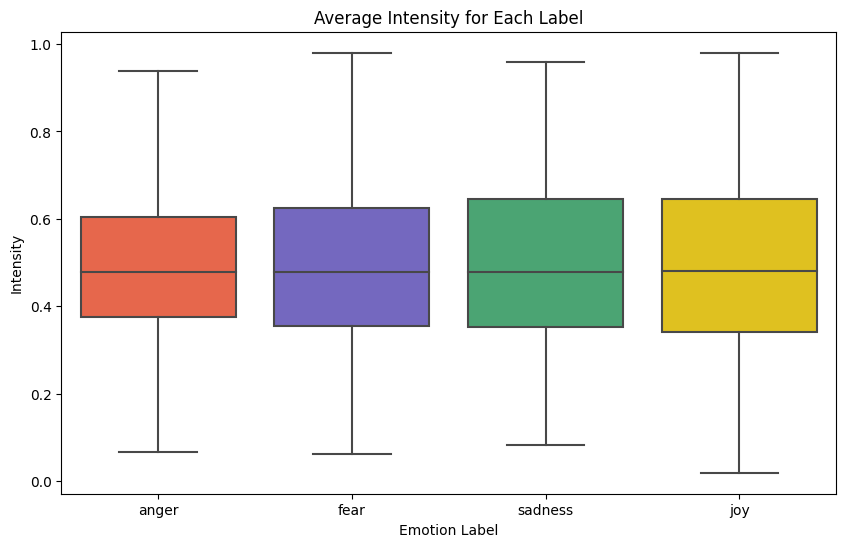

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a different color palette
colors = ['#FF5733', '#6A5ACD', '#3CB371', '#FFD700']  # Example colors

# Plotting the boxplot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bplot = sns.boxplot(data=data_training, x='label', y='intensity', palette=colors)

# Adding title and labels
plt.title('Average Intensity for Each Label')
plt.xlabel('Emotion Label')
plt.ylabel('Intensity')

# Show plot
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\L

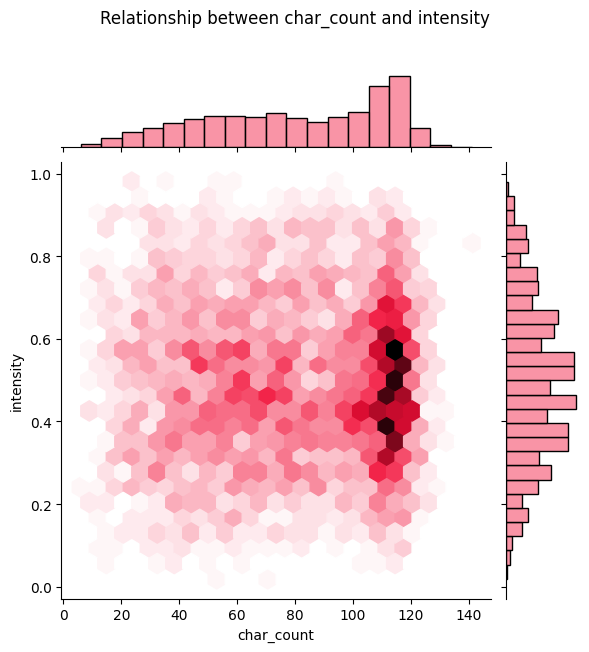

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a different color palette
sns.set_palette("husl")  # Example palette

# Plotting the joint plot
sns.jointplot(data=data_training, x='char_count', y='intensity', kind='hex')

# Adding title
plt.suptitle('Relationship between char_count and intensity', y=1.08)

# Show plot
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\L

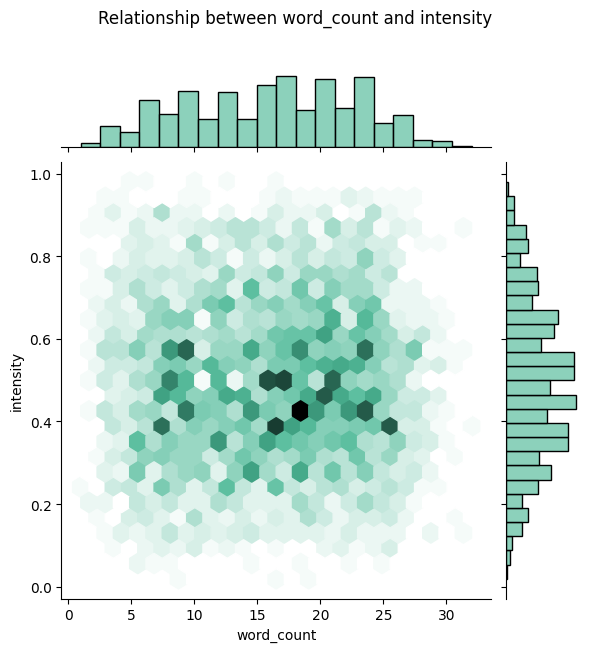

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a different color palette
sns.set_palette("Set2")  # Example palette

# Plotting the joint plot
sns.jointplot(data=data_training, x='word_count', y='intensity', kind='hex')

# Adding title
plt.suptitle('Relationship between word_count and intensity', y=1.08)

# Show plot
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\L

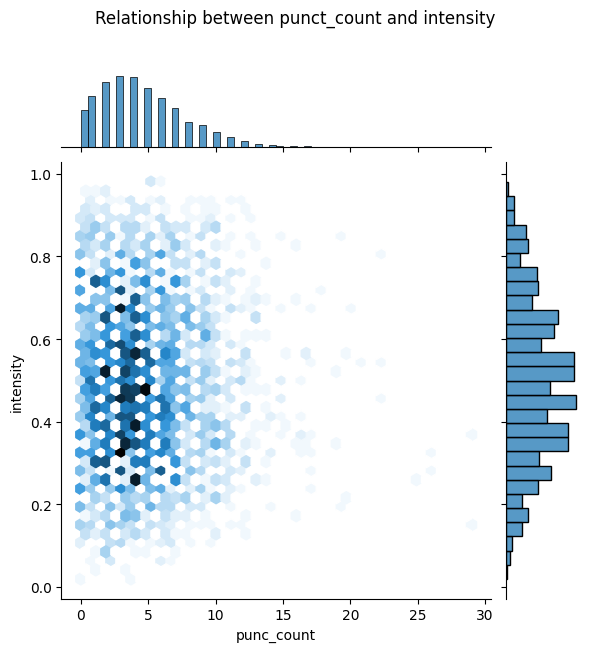

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a different color palette
sns.set_palette("tab10")  # Example palette

# Plotting the joint plot
sns.jointplot(data=data_training, x='punc_count', y='intensity', kind='hex')

# Adding title
plt.suptitle('Relationship between punct_count and intensity', y=1.08)

# Show plot
plt.show()


In [12]:
#Join text in each emotion
join_text_fear = ' '.join(data_training[data_training['label']=='fear']['text'].values)
join_text_anger = ' '.join(data_training[data_training['label']=='anger']['text'].values)
join_text_joy = ' '.join(data_training[data_training['label']=='joy']['text'].values)
join_text_sadness = ' '.join(data_training[data_training['label']=='sadness']['text'].values)

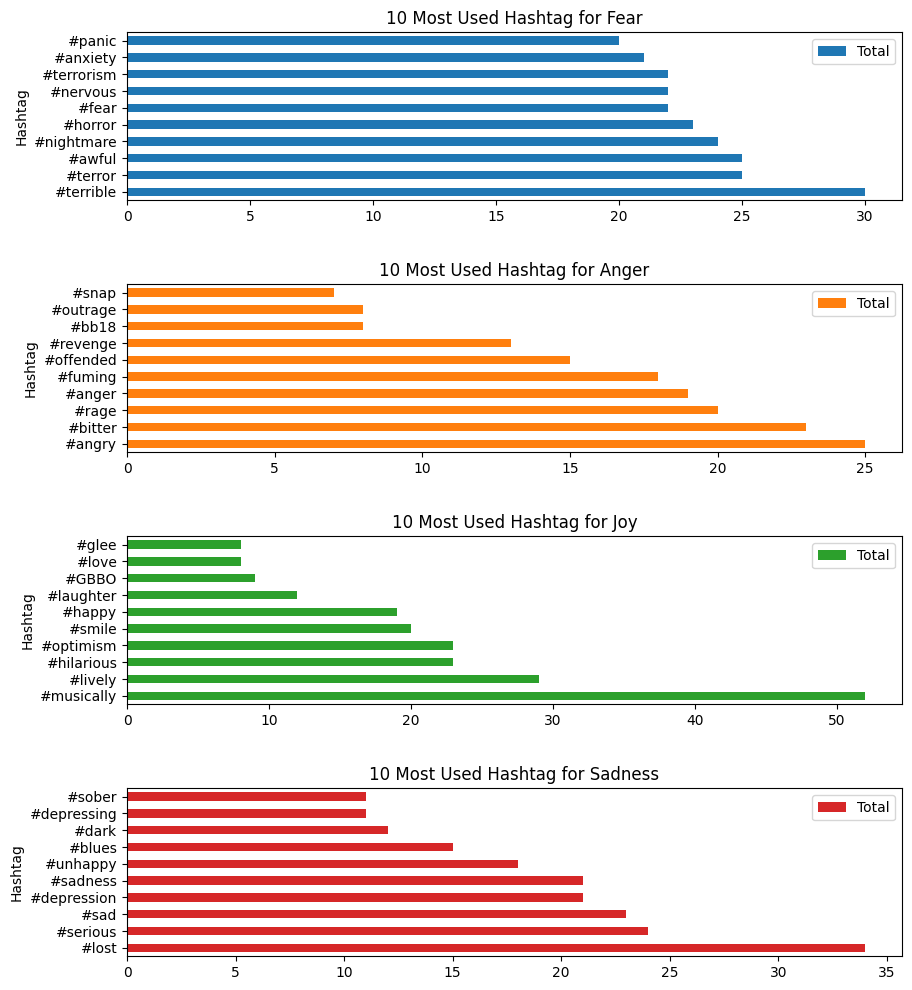

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming you have already calculated the top hashtags for each emotion

# Define a different color palette for each emotion
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example colors

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=.5)

# List of emotions and their corresponding hashtag counters
emotions = ['Fear', 'Anger', 'Joy', 'Sadness']
counters = [fear_counter, anger_counter, joy_counter, sadness_counter]

# Plotting the top hashtags for each emotion with different colors
for ax, emotion, counter, color in zip(axs, emotions, counters, colors):
    most_common = counter.most_common(10)
    df = pd.DataFrame(most_common, columns=["Hashtag", "Total"])
    df.plot.barh(y="Total", x="Hashtag", ax=ax, color=color, title=f"10 Most Used Hashtag for {emotion}")

plt.show()


In [16]:
#Word Cloud for each emotion
stopwords = set(STOPWORDS)

fear_wordcloud = WordCloud(max_font_size=50, background_color='black', stopwords=stopwords, width=900, height=400).generate(join_text_fear)
anger_wordcloud = WordCloud(max_font_size=50, background_color='darkred', stopwords=stopwords, width=900, height=400).generate(join_text_anger)
joy_wordcloud = WordCloud(max_font_size=50, background_color='lightyellow', stopwords=stopwords, width=900, height=400).generate(join_text_joy)
sadness_wordcloud = WordCloud(max_font_size=50, background_color='lightblue', stopwords=stopwords, width=900, height=400).generate(join_text_sadness)

(-0.5, 899.5, 399.5, -0.5)

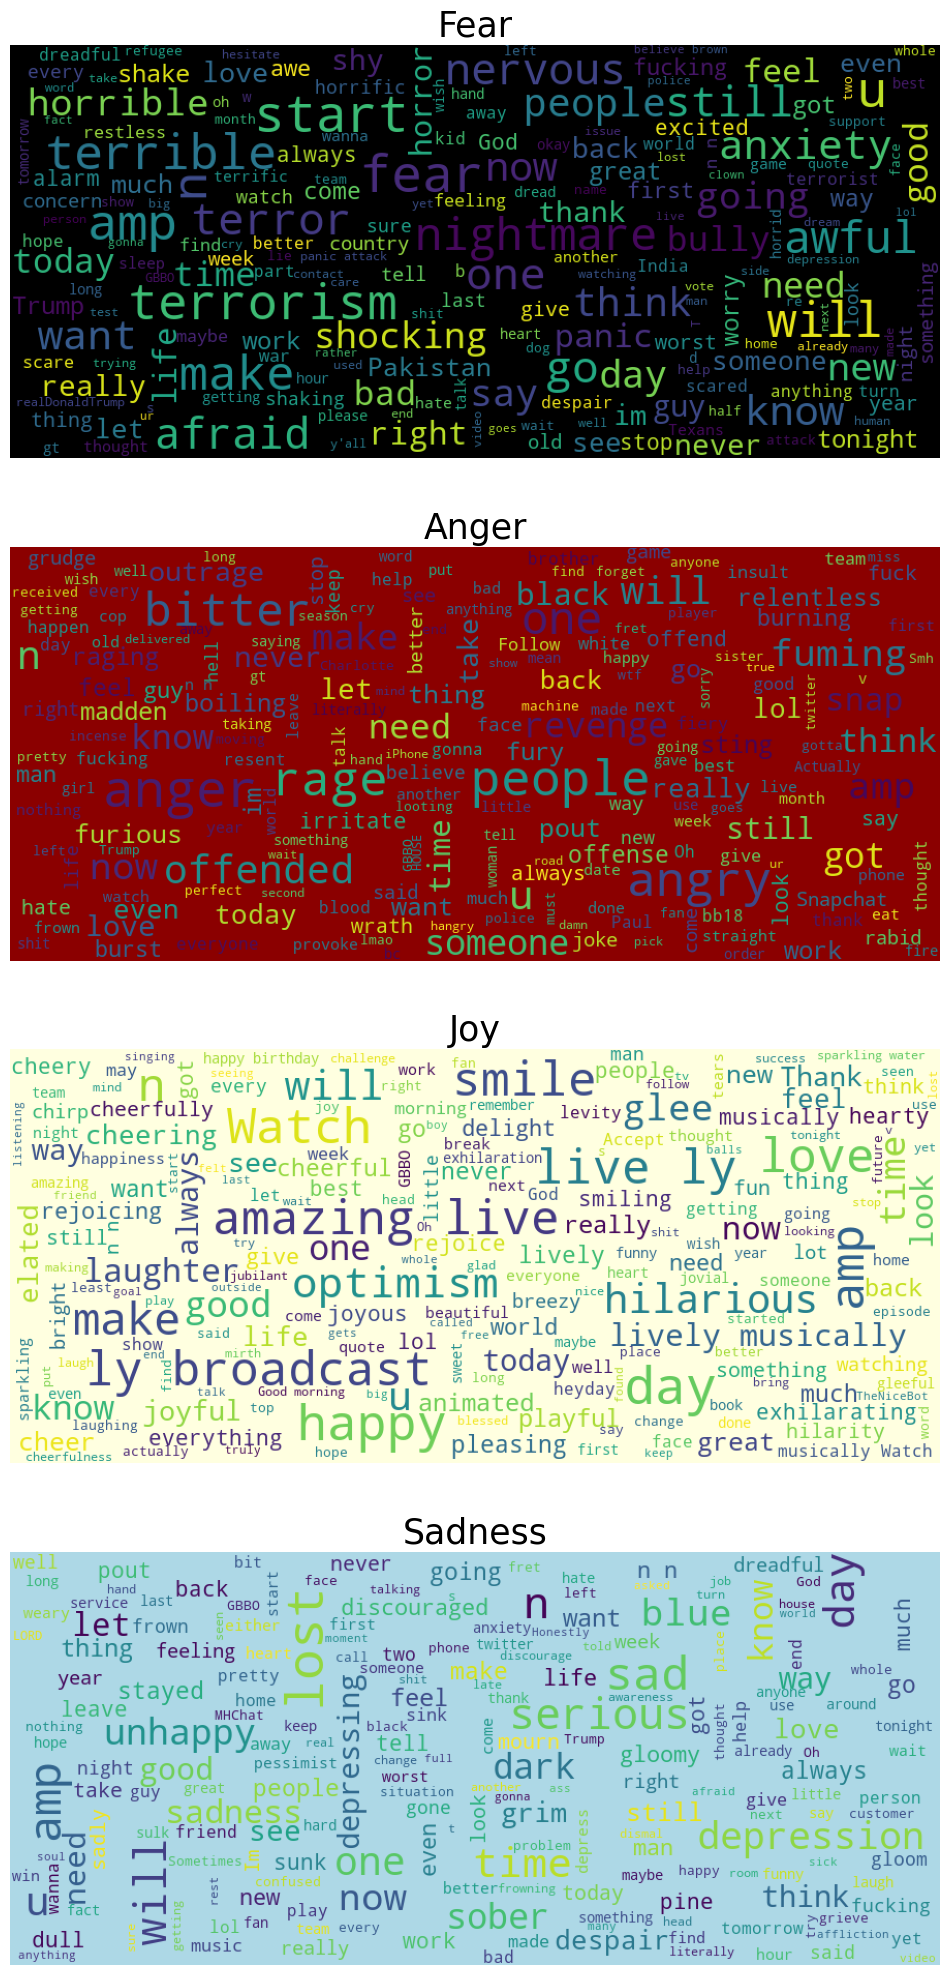

In [17]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 25))

ax1.imshow(fear_wordcloud)
ax1.set_title("Fear", size=25)
ax1.axis('off')

ax2.imshow(anger_wordcloud)
ax2.set_title("Anger", size=25)
ax2.axis('off')

ax3.imshow(joy_wordcloud)
ax3.set_title("Joy", size=25)
ax3.axis('off')

ax4.imshow(sadness_wordcloud)
ax4.set_title("Sadness", size=25)
ax4.axis('off')

# Training
<a id='Training'></a>

In [45]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Define the patterns for cleaning
mention_pattern = r'@[A-Za-z0-9_]+'
url_pattern = r'https?://[A-Za-z0-9./]+'
number_pattern = r'\b\d+\b'
combined_pattern = r'|'.join((mention_pattern, url_pattern, number_pattern))
stop_words = set(stopwords.words('english'))

# Define the tweet cleaner function
def clean_tweet(tweet):
    # Remove mentions, URLs, and numbers from the tweet
    stripped_text = re.sub(combined_pattern, '', tweet)
    # Convert text to lowercase
    lowercase_text = stripped_text.lower()
    # Tokenize the text
    words = word_tokenize(lowercase_text)
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    # Join filtered words back into a string
    cleaned_tweet = ' '.join(filtered_words).strip()
    return cleaned_tweet

# Function to clean text data in a DataFrame
def clean_text_data(data_frame):
    print('Cleaning and parsing the tweets.....\n')
    clean_data = [clean_tweet(tweet) for tweet in data_frame['text']]
    print('Done!')
    return clean_data


In [46]:
clean_data_training_list = clean_text_data(data_training)

Cleaning and parsing the tweets.....

Done!


In [47]:
data_training.text = pd.DataFrame(clean_data_training_list)
data_training.head()

,id,text,label,intensity,word_count,char_count,punc_count
0,10000,fu * k ! heck ! moved fridge ! ... knock landl...,anger,0.938,18,79,12
1,10001,indian uber driver called someone n word . n't...,anger,0.896,23,97,4
2,10002,asked parcel delivered pick store address # fu...,anger,0.896,19,90,4
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,24,111,13
4,10004,"n't join put phone , talk rude . taking money ...",anger,0.896,24,102,6


In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Perform one-hot encoding of labels
labels = pd.get_dummies(data_training['label'])

# Initialize CountVectorizer for bag-of-words (BoW) technique
vectorizer_bow = CountVectorizer(max_features=1000, ngram_range=(1, 3))

# Vectorize the tweets using BoW technique
X_bow = vectorizer_bow.fit_transform(data_training.text)
X_bow = pd.DataFrame.sparse.from_spmatrix(X_bow).join(labels)

# Initialize TfidfVectorizer for TF-IDF technique
vectorizer_tfidf = TfidfVectorizer(max_features=1000)

# Vectorize the tweets using TF-IDF technique
X_tfidf = vectorizer_tfidf.fit_transform(data_training.text)
X_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf).join(labels)


In [49]:
X_bow 

,0,1,2,3,4,5,6,7,8,9,...,994,995,996,997,998,999,anger,fear,joy,sadness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,True,False,False,False
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,True,False,False,False
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,True,False,False,False
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,True,False,False,False
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False
3609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False
3610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False
3611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False


In [27]:
X_tfidf

,0,1,2,3,4,5,6,7,8,9,...,994,995,996,997,998,999,anger,fear,joy,sadness
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False
3609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False
3610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False
3611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False


In [60]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Convert feature names to strings for BoW and TF-IDF data
X_bow.columns = X_bow.columns.astype(str)
X_tfidf.columns = X_tfidf.columns.astype(str)

# Training Regression Models

# Linear Regression
linreg_BoW = LinearRegression().fit(X_bow, data_training['intensity'])
linreg_tfidf = LinearRegression().fit(X_tfidf, data_training['intensity'])

# Ridge Regression
ridge_BoW = Ridge().fit(X_bow, data_training['intensity'])
ridge_tfidf = Ridge().fit(X_tfidf, data_training['intensity'])

# K-Nearest Neighbors Regression
n_neighbors = 5
knn_BoW = KNeighborsRegressor(n_neighbors, weights='uniform').fit(X_bow, data_training['intensity'])
knn_tfidf = KNeighborsRegressor(n_neighbors, weights='uniform').fit(X_tfidf, data_training['intensity'])

# Decision Tree Regression
tree_BoW = DecisionTreeRegressor(max_depth=1).fit(X_bow, data_training['intensity'])
tree_tfidf = DecisionTreeRegressor(max_depth=1).fit(X_tfidf, data_training['intensity'])

# Support Vector Regression
svr_BoW = SVR().fit(X_bow, data_training['intensity'])
svr_tfidf = SVR().fit(X_tfidf, data_training['intensity'])


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFr

In [61]:
#Load data development to test the models
cols = ['id', 'text', 'label', 'intensity']


anger_dev = pd.read_csv('data/dev/anger-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
fear_dev = pd.read_csv('data/dev/fear-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
sad_dev = pd.read_csv('data/dev/sadness-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
joy_dev = pd.read_csv('data/dev/joy-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)

joy_dev.head()

,text,label,intensity
id,,,
30823,"@theclobra lol I thought maybe, couldn't decid...",joy,0.312
30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700
30825,Nawaz Sharif is getting more funnier than @kap...,joy,0.580
30826,@tomderivan73 😁...I'll just people watch and e...,joy,0.438
30827,I love my family so much #lucky #grateful #sma...,joy,0.936


In [62]:
frames = [anger_dev, fear_dev, sad_dev, joy_dev]
data_dev = pd.concat(frames)
data_dev.reset_index(inplace=True)
data_dev.label.value_counts()

label
fear       110
anger       84
joy         79
sadness     74
Name: count, dtype: int64

In [63]:
clean_data_dev_list = tweet_cleaner(data_dev)

Cleaning and parsing the tweets.....

Done!


In [64]:
data_dev.text = pd.DataFrame(clean_data_dev_list)
data_dev.head()

,id,text,label,intensity
0,10857,pls dont insult word ' molna ',anger,0.479
1,10858,would almost took offense actually snapped,anger,0.458
2,10859,rutgers game abomination . affront god man . m...,anger,0.562
3,10860,"' lisa asked started raging , ' call ?' heh",anger,0.500
4,10861,sometimes get mad something minuscule try ruin...,anger,0.708


In [65]:
labels = pd.get_dummies(data_dev['label'])

X_Dev_BoW = vectorizer_bow.transform(data_dev['text'])
X_Dev_BoW = pd.DataFrame.sparse.from_spmatrix(X_Dev_BoW).join(labels)

X_Dev_tfidf = vectorizer_tfidf.transform(data_dev['text'])
X_Dev_tfidf = pd.DataFrame.sparse.from_spmatrix(X_Dev_tfidf).join(labels)

In [66]:
from sklearn import metrics
import numpy as np

def print_scores(y_test, y_pred, model_name):
    print(model_name + ' Scores\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('-------------------------------------------------------------------------------')


In [67]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Define the list of regression models and their corresponding names
models = [
    (linreg_BoW, "BoW-Linear Regression"),
    (linreg_tfidf, "Tfidf-Linear Regression"),
    (ridge_BoW, "BoW-Ridge Regression"),
    (ridge_tfidf, "Tfidf-Ridge Regression"),
    (knn_BoW, "BoW-Knn Regression"),
    (knn_tfidf, "Tfidf-Knn Regression"),
    (tree_BoW, "BoW-Decision Tree Regression"),
    (tree_tfidf, "Tfidf-Decision Tree Regression"),
    (svr_BoW, "BoW-SVR"),
    (svr_tfidf, "Tfidf-SVR")
]

def evaluate_models(models, X_dev_bow, X_dev_tfidf, data_dev):
    # Convert feature names to strings for development data
    X_dev_bow.columns = X_dev_bow.columns.astype(str)
    X_dev_tfidf.columns = X_dev_tfidf.columns.astype(str)

    # Iterate over the regression models and print scores
    for model, model_name in models:
        X_dev = X_dev_bow if "BoW" in model_name else X_dev_tfidf
        y_pred = model.predict(X_dev)
        print_scores(data_dev['intensity'], y_pred, model_name)

# Usage
evaluate_models(models, X_Dev_BoW, X_Dev_tfidf, data_dev)


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


BoW-Linear Regression Scores

Mean Absolute Error: 4698752987.750747
Mean Squared Error: 3.830581517277888e+21
Root Mean Squared Error: 61891691827.56187
-------------------------------------------------------------------------------
Tfidf-Linear Regression Scores

Mean Absolute Error: 0.14941334907465778
Mean Squared Error: 0.03638901161540344
Root Mean Squared Error: 0.1907590407173496
-------------------------------------------------------------------------------
BoW-Ridge Regression Scores

Mean Absolute Error: 0.1418944590562027
Mean Squared Error: 0.03296463466000286
Root Mean Squared Error: 0.18156165525793946
-------------------------------------------------------------------------------


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Tfidf-Ridge Regression Scores

Mean Absolute Error: 0.13380468819243108
Mean Squared Error: 0.029157870613128634
Root Mean Squared Error: 0.17075675861625106
-------------------------------------------------------------------------------
BoW-Knn Regression Scores

Mean Absolute Error: 0.14091181556195964
Mean Squared Error: 0.03023310501440922
Root Mean Squared Error: 0.17387669485704293
-------------------------------------------------------------------------------
Tfidf-Knn Regression Scores

Mean Absolute Error: 0.15387204610951008
Mean Squared Error: 0.03665179942363113
Root Mean Squared Error: 0.19144659679302511
-------------------------------------------------------------------------------
BoW-Decision Tree Regression Scores

Mean Absolute Error: 0.1492390950258543
Mean Squared Error: 0.033132012102861916
Root Mean Squared Error: 0.18202200994072645
-------------------------------------------------------------------------------


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Tfidf-Decision Tree Regression Scores

Mean Absolute Error: 0.15474240499275288
Mean Squared Error: 0.0352650686884577
Root Mean Squared Error: 0.18778995896601527
-------------------------------------------------------------------------------


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


BoW-SVR Scores

Mean Absolute Error: 0.13041957394357986
Mean Squared Error: 0.026598683458732522
Root Mean Squared Error: 0.163091028136843
-------------------------------------------------------------------------------


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Tfidf-SVR Scores

Mean Absolute Error: 0.12499626417273683
Mean Squared Error: 0.024807871758152102
Root Mean Squared Error: 0.1575051483544335
-------------------------------------------------------------------------------


In [77]:
#SVR model with tf-idf vectorisation produce the smallest error, so it is chosen as the final model
y_actual = data_dev['intensity']
y_predicted = svr_tfidf.predict(X_Dev_tfidf)

pd.DataFrame(data={"Actual Intensity" : data_dev['intensity'], "Predicted Intensity" : svr_tfidf.predict(X_Dev_tfidf)})

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,Actual Intensity,Predicted Intensity
0,0.479,0.494375
1,0.458,0.372058
2,0.562,0.500378
3,0.500,0.601386
4,0.708,0.554270
...,...,...
342,0.580,0.494626
343,0.170,0.450386
344,0.396,0.311072
345,0.156,0.328326


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

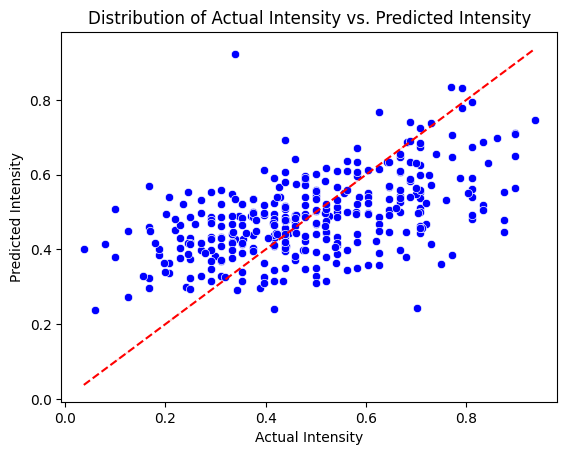

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of actual intensity to the predicted intensity
sns.scatterplot(x=y_actual, y=y_predicted, color='blue')
sns.lineplot(x=y_actual, y=y_actual, color='red', linestyle='--')
plt.xlabel("Actual Intensity")
plt.ylabel("Predicted Intensity")
plt.title("Distribution of Actual Intensity vs. Predicted Intensity")
plt.show()


In [83]:
#Training the final model with the combination of training and development data
combined_training = pd.concat([data_training[['id', 'text', 'label', 'intensity']], data_dev]).reset_index()
combined_training.shape

(3960, 5)

In [84]:
# Making a separate model for each emotion

# ANGER
anger_data = combined_training.loc[combined_training['label'] == 'anger']
anger_vectorizer = TfidfVectorizer(max_features=1000)
X_anger = anger_vectorizer.fit_transform(anger_data['text'])
anger_model = svm.SVR().fit(X_anger, anger_data['intensity'])

# FEAR
fear_data = combined_training.loc[combined_training['label'] == 'fear']
fear_vectorizer = TfidfVectorizer(max_features=1000)
X_fear = fear_vectorizer.fit_transform(fear_data['text'])
fear_model = svm.SVR().fit(X_fear, fear_data['intensity'])

# SADNESS
sadness_data = combined_training.loc[combined_training['label'] == 'sadness']
sadness_vectorizer = TfidfVectorizer(max_features=1000)
X_sadness = sadness_vectorizer.fit_transform(sadness_data['text'])
sadness_model = svm.SVR().fit(X_sadness, sadness_data['intensity'])

# JOY
joy_data = combined_training.loc[combined_training['label'] == 'joy']
joy_vectorizer = TfidfVectorizer(max_features=1000)
X_joy = joy_vectorizer.fit_transform(joy_data['text'])
joy_model = svm.SVR().fit(X_joy, joy_data['intensity'])


# Testing
<a id='Testing'></a>

In [85]:
#Load testing data
cols = ["id", "text", "label", "intensity"]

#path = "../input/wassa2017-emotion-intensity/"
anger_test = pd.read_csv('data/test/anger-ratings-0to1.test.gold.txt', header=None, sep="\t", names=cols, index_col=0)
fear_test = pd.read_csv('data/test/fear-ratings-0to1.test.gold.txt', header=None, sep="\t", names=cols, index_col=0)
sad_test = pd.read_csv('data/test/sadness-ratings-0to1.test.gold.txt', header=None, sep="\t", names=cols, index_col=0)
joy_test = pd.read_csv('data/test/joy-ratings-0to1.test.gold.txt', header=None, sep="\t", names=cols, index_col=0)

anger_test.head()

,text,label,intensity
id,,,
10941,At the point today where if someone says somet...,anger,0.319
10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
10943,This game has pissed me off more than any othe...,anger,0.898
10944,@spamvicious I've just found out it's Candice ...,anger,0.271
10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646


In [86]:
#cleaning the test data
anger_text = tweet_cleaner(anger_test)
fear_text = tweet_cleaner(fear_test)
sad_text = tweet_cleaner(sad_test)
joy_text = tweet_cleaner(joy_test)

Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!


In [89]:
# Making predictions using the final model

# ANGER
X_anger_test = anger_vectorizer.transform(anger_text)
Y_anger_actual = anger_test['intensity']
Y_anger_predicted = anger_model.predict(X_anger_test)

# FEAR
X_fear_test = fear_vectorizer.transform(fear_text)
Y_fear_actual = fear_test['intensity']
Y_fear_predicted = fear_model.predict(X_fear_test)

# SADNESS
X_sadness_test = sadness_vectorizer.transform(sad_text)
Y_sadness_actual = sad_test['intensity']
Y_sadness_predicted = sadness_model.predict(X_sadness_test)

# JOY
X_joy_test = joy_vectorizer.transform(joy_text)
Y_joy_actual = joy_test['intensity']
Y_joy_predicted = joy_model.predict(X_joy_test)


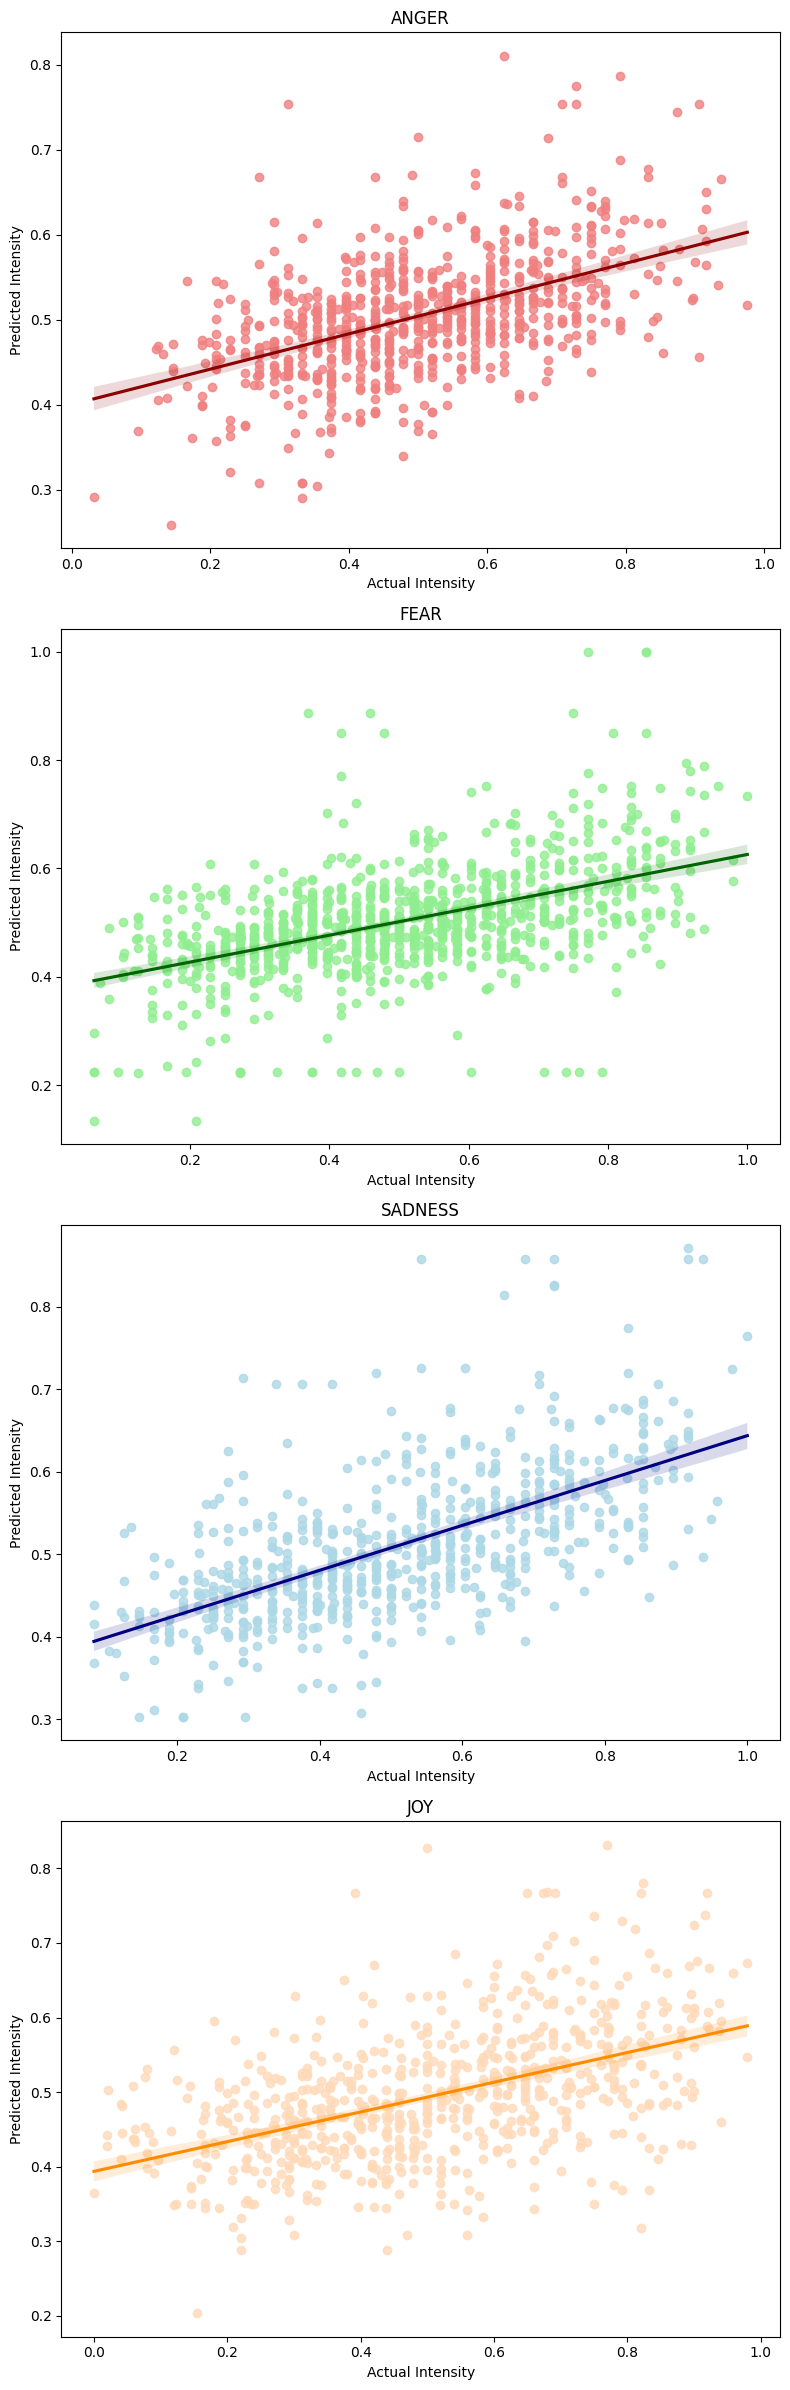

In [91]:
# Visualizing the result of the predictions
fig, axes = plt.subplots(4, 1, figsize=(8, 24))

# ANGER
sns.regplot(x=Y_anger_actual, y=Y_anger_predicted, ax=axes[0], line_kws={'color':'darkred'}, scatter_kws={"color": "lightcoral"})
axes[0].set_xlabel("Actual Intensity")
axes[0].set_ylabel("Predicted Intensity")
axes[0].set_title("ANGER")

# FEAR
sns.regplot(x=Y_fear_actual, y=Y_fear_predicted, ax=axes[1], line_kws={'color':'darkgreen'}, scatter_kws={"color": "lightgreen"})
axes[1].set_xlabel("Actual Intensity")
axes[1].set_ylabel("Predicted Intensity")
axes[1].set_title("FEAR")

# SADNESS
sns.regplot(x=Y_sadness_actual, y=Y_sadness_predicted, ax=axes[2], line_kws={'color':'navy'}, scatter_kws={"color": "lightblue"})
axes[2].set_xlabel("Actual Intensity")
axes[2].set_ylabel("Predicted Intensity")
axes[2].set_title("SADNESS")

# JOY
sns.regplot(x=Y_joy_actual, y=Y_joy_predicted, ax=axes[3], line_kws={'color':'darkorange'}, scatter_kws={"color": "peachpuff"})
axes[3].set_xlabel("Actual Intensity")
axes[3].set_ylabel("Predicted Intensity")
axes[3].set_title("JOY")

plt.tight_layout()
plt.show()


In [94]:
# Define function to get the scores
def get_scores(y_actual, y_predicted, name):
    print(name + '\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_predicted))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_predicted))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_predicted)))
    print('-------------------------------------------------------------------------------')

# Calculate and print scores for each emotion model
# Calculate and print scores for each emotion model
get_scores(Y_anger_actual, Y_anger_predicted, "Result of Anger Model")
get_scores(Y_fear_actual, Y_fear_predicted, "Result of Fear Model")
get_scores(Y_sadness_actual, Y_sadness_predicted, "Result of Sadness Model")
get_scores(Y_joy_actual, Y_joy_predicted, "Result of Joy Model")



Result of Anger Model

Mean Absolute Error: 0.12107665669375696
Mean Squared Error: 0.02230755385059122
Root Mean Squared Error: 0.14935713525168867
-------------------------------------------------------------------------------
Result of Fear Model

Mean Absolute Error: 0.14175423550375463
Mean Squared Error: 0.030243909301848552
Root Mean Squared Error: 0.1739077609017164
-------------------------------------------------------------------------------
Result of Sadness Model

Mean Absolute Error: 0.13525074809833484
Mean Squared Error: 0.02675292141444317
Root Mean Squared Error: 0.16356320311868183
-------------------------------------------------------------------------------
Result of Joy Model

Mean Absolute Error: 0.15574444566451615
Mean Squared Error: 0.036363970500632094
Root Mean Squared Error: 0.19069339396169993
-------------------------------------------------------------------------------


# Evaluation
<a id='Evaluasi'></a>

In [95]:
import numpy as np
import scipy.stats

def custom_evaluate(predictions, gold_standard):
    # Lists to store gold and prediction scores
    gold_scores = []  
    pred_scores = []

    # Lists for gold and prediction scores where gold score >= 0.5
    gold_scores_range_05_1 = []
    pred_scores_range_05_1 = []
        
    # Fill the lists with data
    for pred in predictions:
        pred_scores.append(pred)
        
    for gold in gold_standard:
        gold_scores.append(gold)

    for i in range(len(gold_scores)):
        if gold_scores[i] >= 0.5:
            gold_scores_range_05_1.append(gold_scores[i])
            pred_scores_range_05_1.append(pred_scores[i])

    # Return zero correlation if predictions are constant
    if np.std(pred_scores) == 0 or np.std(gold_scores) == 0:
        return (0, 0, 0, 0)
    
    # Calculate Pearson correlation coefficients
    pearson_corr = scipy.stats.pearsonr(pred_scores, gold_scores)[0]                                     
    pearson_corr_range_05_1 = scipy.stats.pearsonr(pred_scores_range_05_1, gold_scores_range_05_1)[0]                                           
    
    return (pearson_corr, pearson_corr_range_05_1)


In [97]:
# Initialize lists to store results
pear_results = []
spear_results = []
pear_results_range_05_1 = []
spear_results_range_05_1 = []

num_pairs = 4
argv = ["Anger_Actual", Y_anger_actual, "Anger_Predicted", Y_anger_predicted, 
        "Fear_Actual", Y_fear_actual, "Fear_Predicted", Y_fear_predicted, 
        "Sad_Actual", Y_sadness_actual, "Sad_Predicted", Y_sadness_predicted, 
        "Joy_Actual", Y_joy_actual, "Joy_Predicted", Y_joy_predicted]

# Loop through the pairs of actual and predicted data
for i in range(0, num_pairs * 4, 4):
    name_gold = argv[i]
    gold = argv[i + 1]
    name_pred = argv[i + 2]
    pred = argv[i + 3]       
    result = custom_evaluate(pred, gold)
    
    print("Pearson correlation between ", name_pred, " and ", name_gold, ":\t", str(result[0]))        
    pear_results.append(result[0])

    print("Pearson correlation for gold scores in range 0.5-1 between ", name_pred, " and ", name_gold, ":\t", str(result[1]))       
    pear_results_range_05_1.append(result[1])

# Calculate the average Pearson correlation
avg_pear = np.mean(pear_results)
avg_pear_range_05_1 = np.mean(pear_results_range_05_1)

print("Average Pearson correlation:\t", str(avg_pear))
print("Average Pearson correlation for gold scores in range 0.5-1:\t", str(avg_pear_range_05_1))


Pearson correlation between  Anger_Predicted  and  Anger_Actual :	 0.5020256751545596
Pearson correlation for gold scores in range 0.5-1 between  Anger_Predicted  and  Anger_Actual :	 0.391279106612553
Pearson correlation between  Fear_Predicted  and  Fear_Actual :	 0.500221658996151
Pearson correlation for gold scores in range 0.5-1 between  Fear_Predicted  and  Fear_Actual :	 0.4046100627601059
Pearson correlation between  Sad_Predicted  and  Sad_Actual :	 0.6147986982308857
Pearson correlation for gold scores in range 0.5-1 between  Sad_Predicted  and  Sad_Actual :	 0.44279095547180214
Pearson correlation between  Joy_Predicted  and  Joy_Actual :	 0.4896354831615583
Pearson correlation for gold scores in range 0.5-1 between  Joy_Predicted  and  Joy_Actual :	 0.29309987775133683
Average Pearson correlation:	 0.5266703788857887
Average Pearson correlation for gold scores in range 0.5-1:	 0.38294500064894943
